### Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows', 130)
pd.set_option('display.max.columns', 130)
pd.set_option('float_format', '{:.2f}'.format)
np.set_printoptions(legacy='1.25')

In [ ]:
from util_functions import show_distribution, show_kde, get_max_value, bi_cat_countplot, bi_cat_distribution, bi_cat_distribution_sort_index

bank client data:   
**age** (numeric)   
**job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')   
**marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)   
**education**: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')   
**default**: has credit in default? (categorical: 'no','yes','unknown')   
**housing**: has housing loan? (categorical: 'no','yes','unknown')   
**loan**: has personal loan? (categorical: 'no','yes','unknown')   

related with the last contact of the current campaign:   
**contact**: contact communication type (categorical: 'cellular','telephone')   
month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')    
**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')   
**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.   

other attributes:   
**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)   
**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)   
**previous**: number of contacts performed before this campaign and for this client (numeric)   
**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')    

social and economic context attributes:   
**emp.var.rate**: employment variation rate - quarterly indicator (numeric)   
**cons.price.idx**: consumer price index - monthly indicator (numeric)   
**cons.conf.idx**: consumer confidence index - monthly indicator (numeric)   
**euribor3m**: euribor 3 month rate - daily indicator (numeric)   
**nr.employed**: number of employees - quarterly indicator (numeric)   

target:   
**y** - has the client subscribed a term deposit? (binary: 'yes','no')

### Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/bank-additional-full.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


### Data Overview

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.isnull().values.any()

False

There are no empty values in data

### Categorical Features

In [ ]:
categorical_df = df.select_dtypes(include = 'object')
categorical_columns = categorical_df.columns
print(f'Data contains {len(categorical_columns)} categorical features:')
print(categorical_columns.to_list())

Data contains 11 categorical features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [ ]:
categorical_df.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


#### job

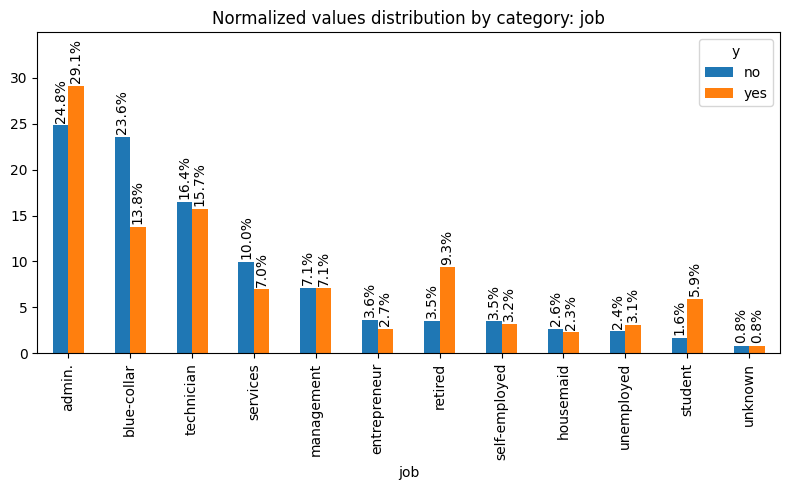

In [ ]:
bi_cat_distribution(df, 'job', 'y')

Clients with job categories `admin`, `retired`, and `student` were more likely to subscribe to a term deposit.   
Clients with job categories `blue-collar` and `services` were more likely not to subscribe to a term deposit.

#### marital

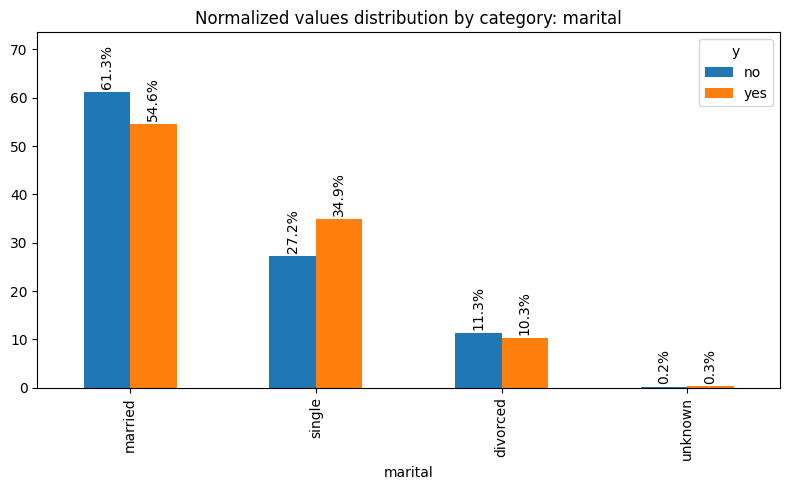

In [ ]:
bi_cat_distribution(df, 'marital', 'y')

Single clients were more likely to subscribe to a term deposit.

#### education

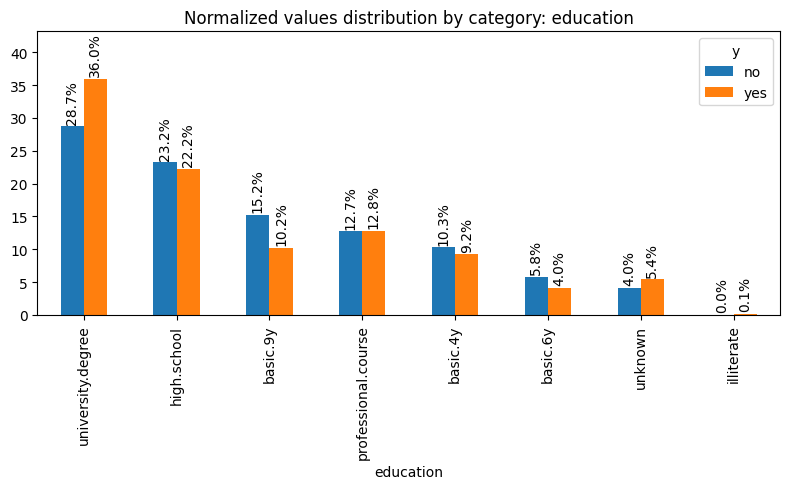

In [ ]:
bi_cat_distribution(df, 'education', 'y')

Clients with university degree were more likely to subscribe to deposit.   
Clients with basic 9 years education were more likely not to subscribe to deposit.

#### default

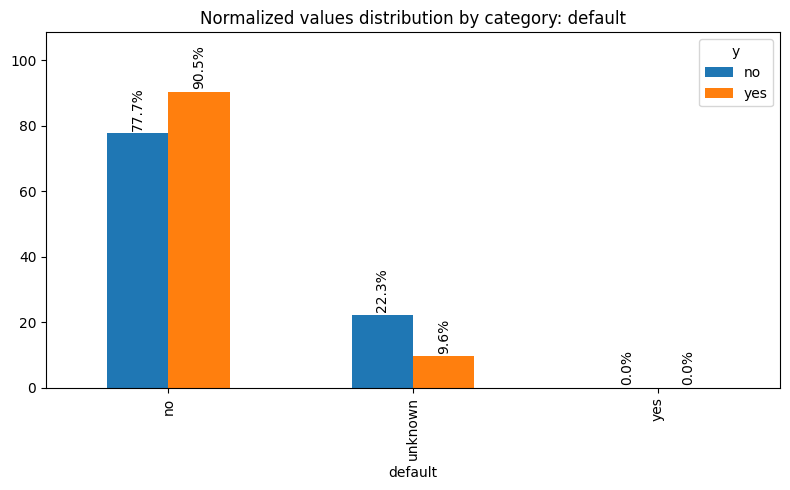

In [ ]:
bi_cat_distribution(df, 'default', 'y')

In [ ]:
df['default'].value_counts(normalize=True) * 100

,proportion
default,
no,79.12
unknown,20.87
yes,0.01


Clients without overdue loan were more likely subscribe to term deposit (90.5% vs 77.7%).    
Default feature data is highly imbalanced, oversampling technique can be used.

#### housing

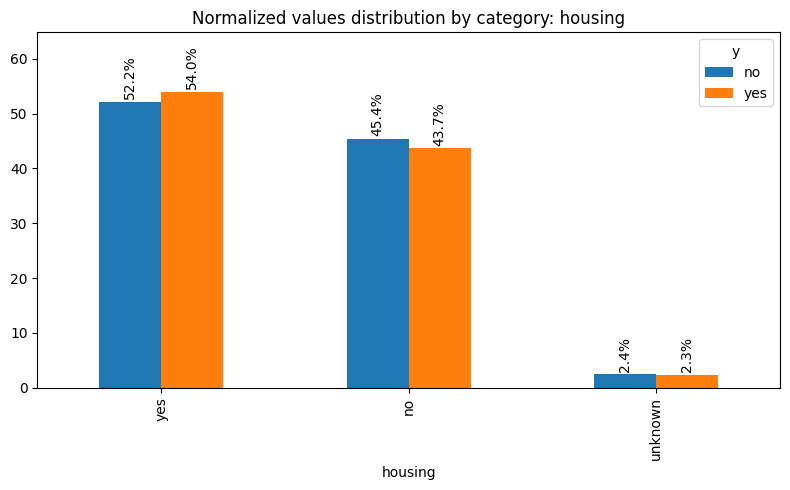

In [ ]:
bi_cat_distribution(df, 'housing', 'y')

There is no significant difference between clients with or without housing loan.

#### loan

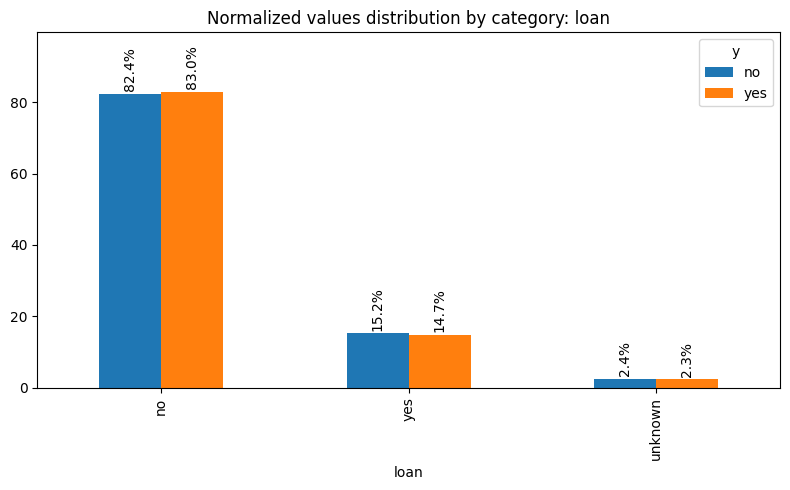

In [ ]:
bi_cat_distribution(df, 'loan', 'y')

There is no significant difference between clients with or without personal loan.

#### contact

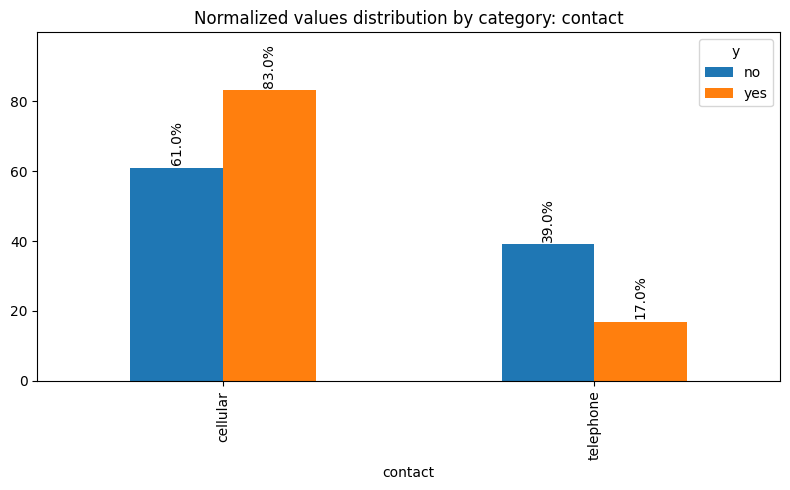

In [ ]:
bi_cat_distribution(df, 'contact', 'y')

Clients contacted by cellular were most likely to subscribe to term deposit compared to clients contacted by telephone.

#### month

In [ ]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

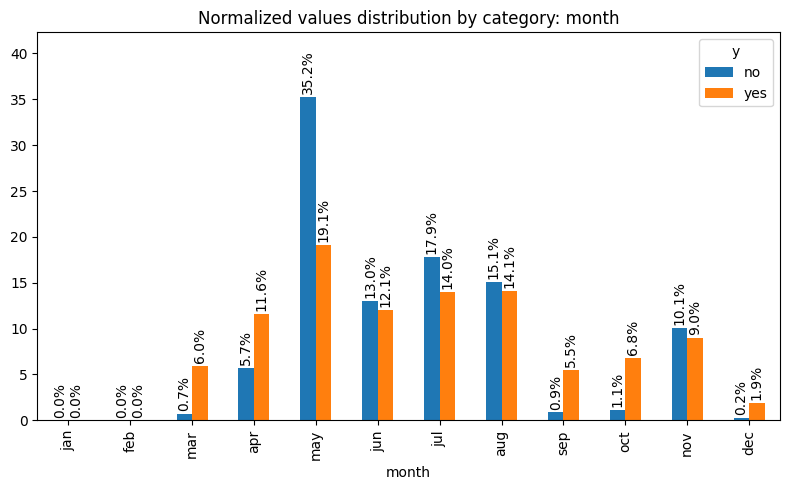

In [ ]:
bi_cat_distribution_sort_index(df, 'month', 'y')

In March, April, September, October and December clients were more likely to subscribe to deposit.   
In May clients were nost likely not to subscribe to deposit.   
Can be ralated to sesonality.

#### day_of_week

In [ ]:
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

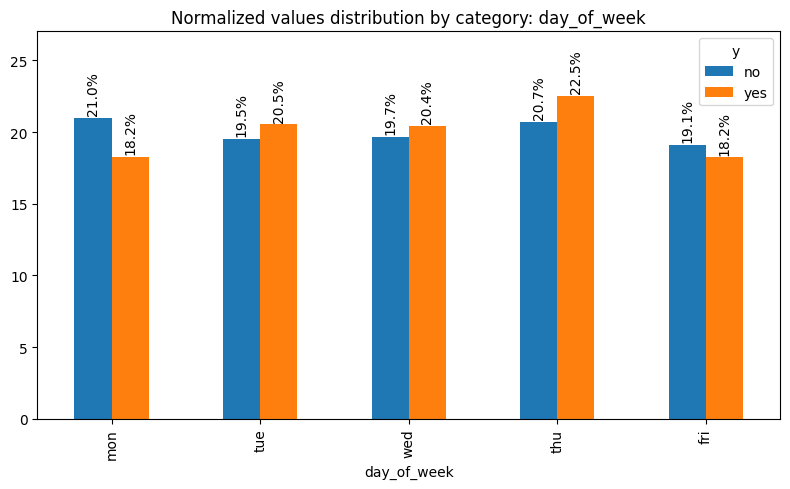

In [ ]:
bi_cat_distribution_sort_index(df, 'day_of_week', 'y')

On Monday and Friday clients were more likely not to subscribe to deposit.

#### poutcome

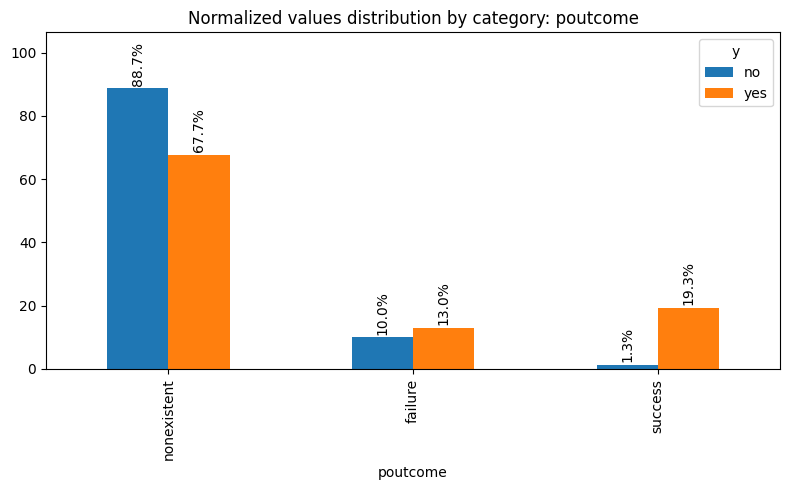

In [ ]:
bi_cat_distribution(df, 'poutcome', 'y')

Clients participated in previous marketing campaign were more likely to subscribe to term deposit, especially with success result in in previous marketing campaign.

### Numerical Features

In [ ]:
numerical_df = df.select_dtypes(include = 'number')
numerical_columns = numerical_df.columns
print(f'Data contains {len(numerical_columns)} numerical features:')
print(numerical_columns.to_list())

Data contains 10 numerical features:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
numerical_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
numerical_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
columns_with_unknown = df.columns[(df == 'unknown').any()]
columns_with_unknown

Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [ ]:
len(columns_with_unknown)

6

In [ ]:
((df[columns_with_unknown] == 'unknown').mean() * 100).sort_values(ascending=False)

,0
default,20.87
education,4.20
housing,2.40
loan,2.40
job,0.80
marital,0.19


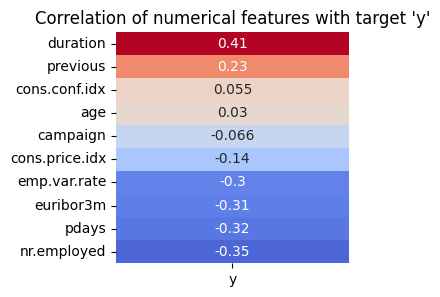

In [ ]:
corr_with_target = numerical_df.copy()
corr_with_target['y'] = df['y'].map({'no': 0, 'yes': 1})
corr = corr_with_target.corr()['y'].drop('y').sort_values(ascending=False)

plt.figure(figsize=(3, 3))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', center=0, cbar=False)
plt.title("Correlation of numerical features with target 'y'")
plt.show()

#### age

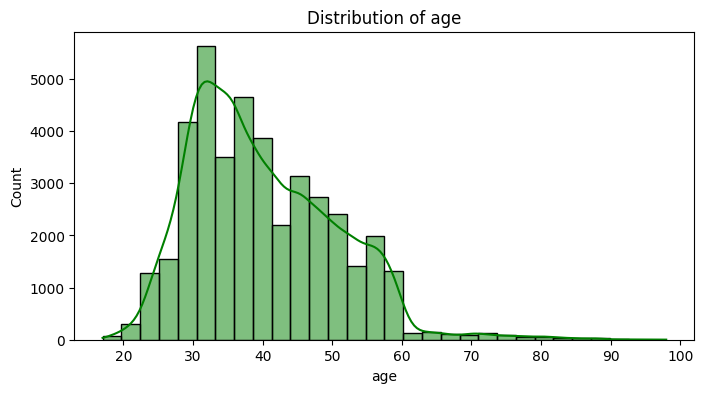

In [ ]:
show_distribution(df, 'age')

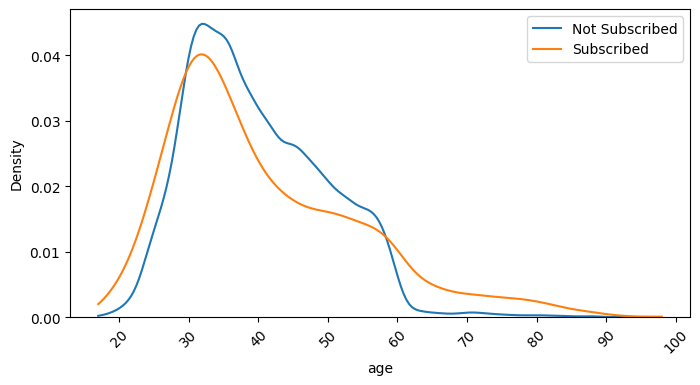

In [ ]:
show_kde(df, 'age')

The distributions overlap heavily in the 30–60 age range.   
This is the core customer segment where both subscribers and non-subscribers are concentrated.   
Clients over 60 years old and younger 25 years old were more likely subscribe to term deposit.

#### duration

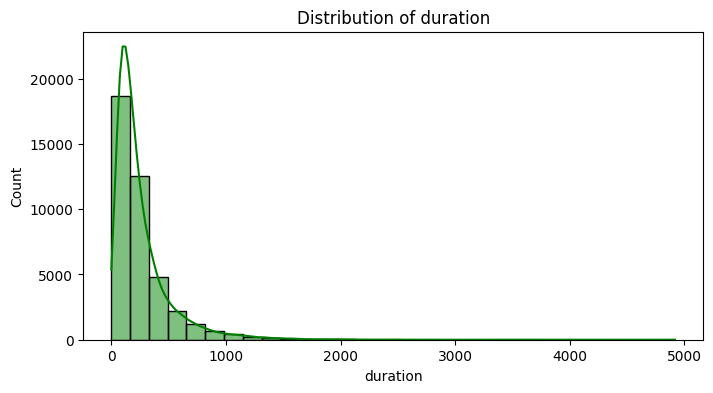

In [ ]:
show_distribution(df, 'duration')

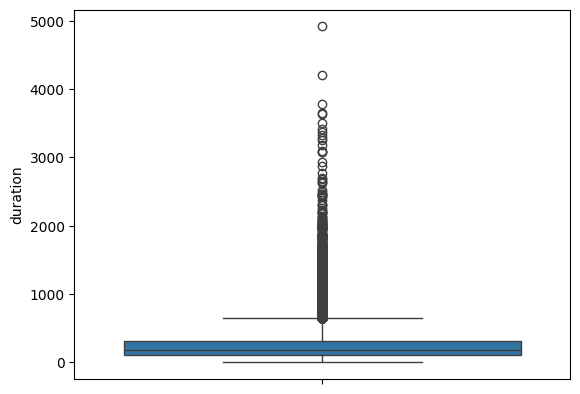

In [ ]:
sns.boxplot(df.duration)
plt.show()

Duration feature has many outliers and also has high correlation with target feature. Since we know duration value only after call with client and when we already know the result if client subscribed to deposit, we should not use this feature for model training.

#### campaign

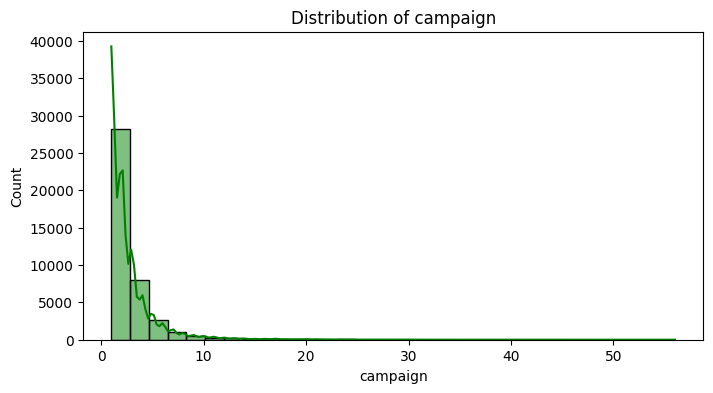

In [ ]:
show_distribution(df, 'campaign')

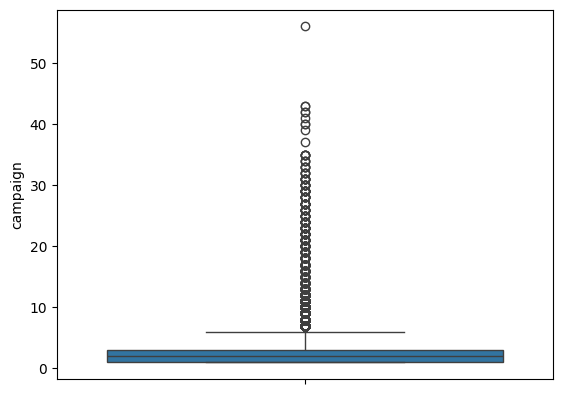

In [ ]:
sns.boxplot(df.campaign)
plt.show()

We can see that campaign data has outliers.

In [ ]:
df['campaign'].describe()

,campaign
count,41188.00
mean,2.57
std,2.77
min,1.00
25%,1.00
50%,2.00
75%,3.00
max,56.00


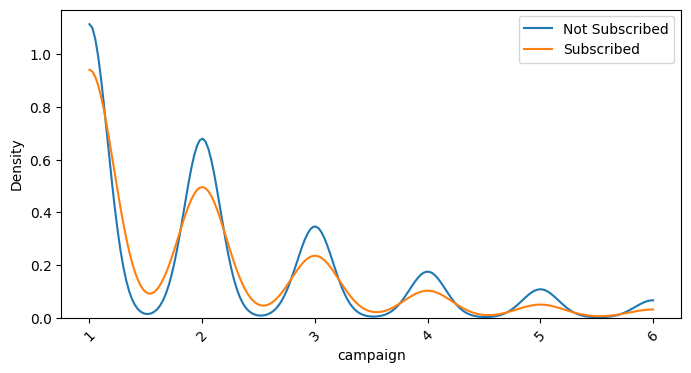

In [ ]:
show_kde(df.loc[df['campaign'] <= get_max_value(df, 'campaign')], 'campaign')

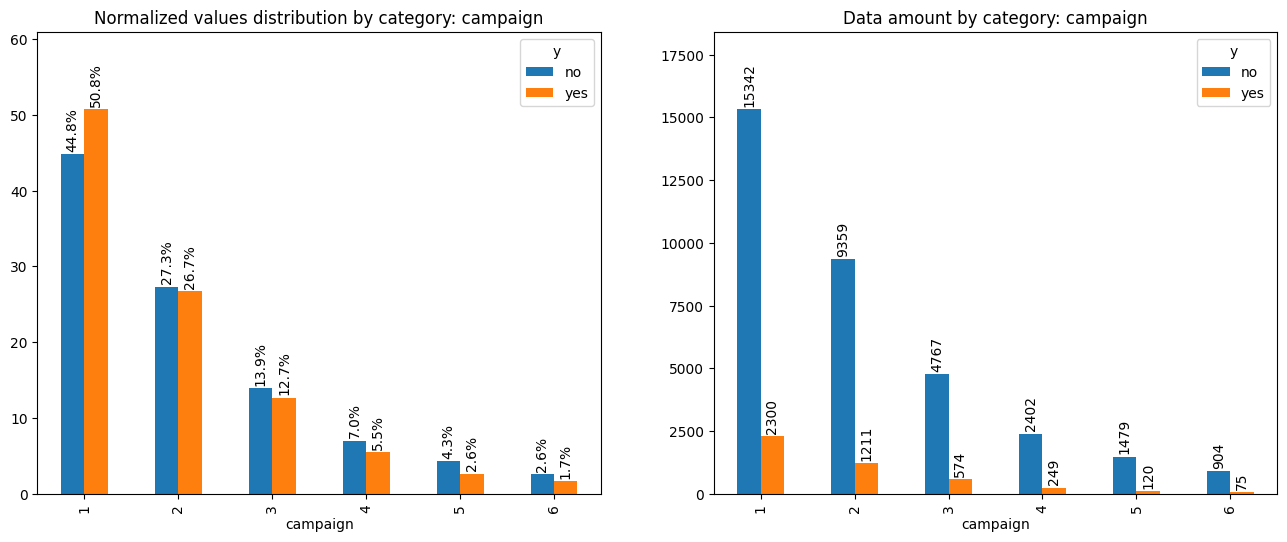

In [ ]:
bi_cat_countplot(df.loc[df['campaign'] <= get_max_value(df, 'campaign')], 'campaign', 'y')

Clients who had only 1 contact during campaign were more likely to subscribe to a term deposit (50.8% vs. 44.8%).   
Clients who had more the 1 contact were less likely to subscribe to a term deposit.

#### pdays

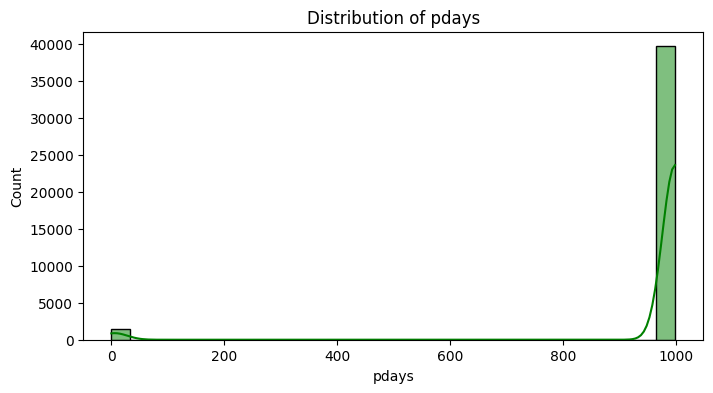

In [ ]:
show_distribution(df, 'pdays')

In [ ]:
(df['pdays'].value_counts(normalize=True) * 100).head(10)

,proportion
pdays,
999,96.32
3,1.07
6,1.00
4,0.29
9,0.16
2,0.15
7,0.15
12,0.14
10,0.13


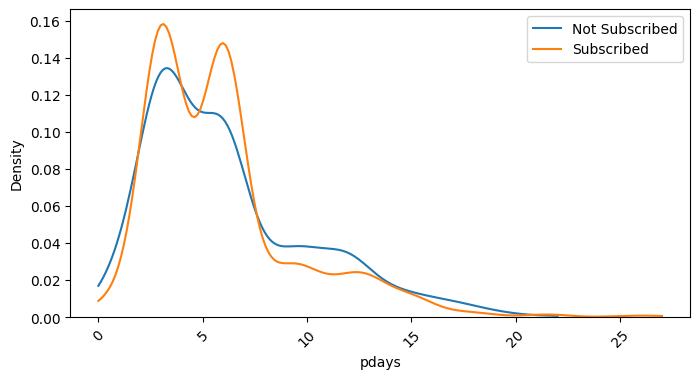

In [ ]:
show_kde(df.loc[df['pdays'] != 999], 'pdays')

`96.32%` of clients were not contacted previously.    
Client were more likely to subscribe to deposit if 2-7 days passed since the last contact.

#### previous

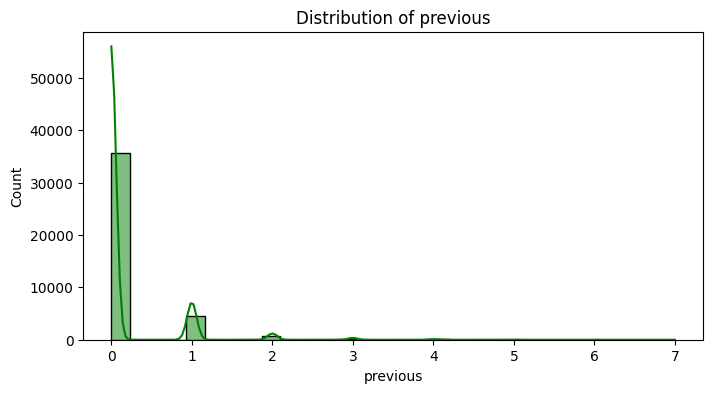

In [ ]:
show_distribution(df, 'previous')

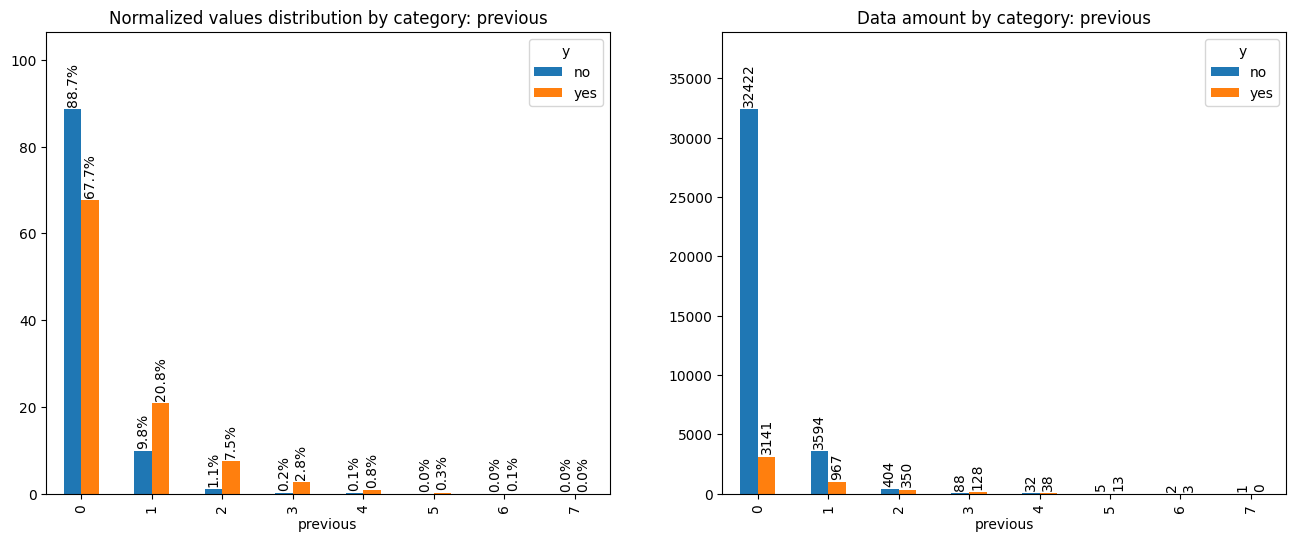

In [ ]:
bi_cat_countplot(df, 'previous', 'y')

Previously contacted clients were mosre likely to subscribe to term deposit.    
Significant difference between non-subscribers and subscribers without previous contant (88.7% vs 67.7%).

#### emp.var.rate

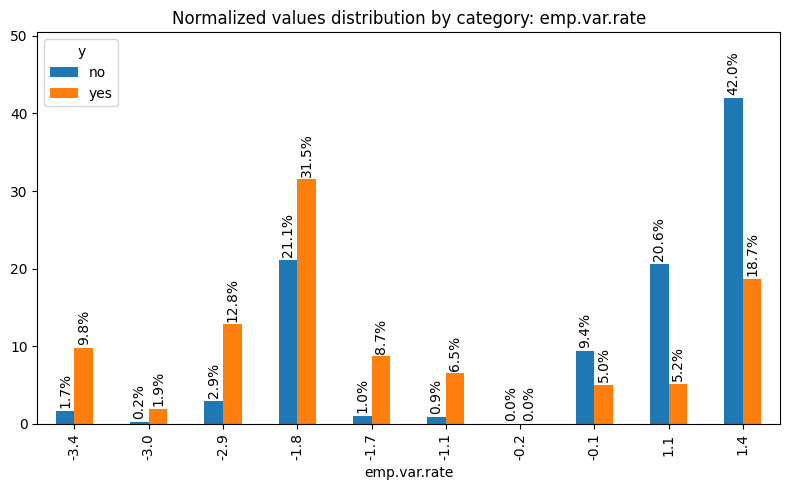

In [ ]:
bi_cat_distribution_sort_index(df, 'emp.var.rate', 'y')

Clients with employement variation rate less than `-0.2` were more likely to subscribe to deposit.

#### cons.price.idx

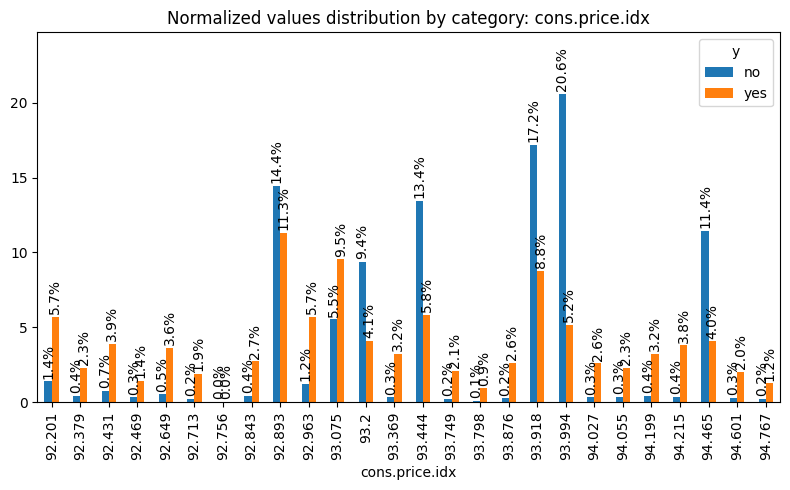

In [ ]:
bi_cat_distribution_sort_index(df, 'cons.price.idx', 'y')

#### cons.conf.idx

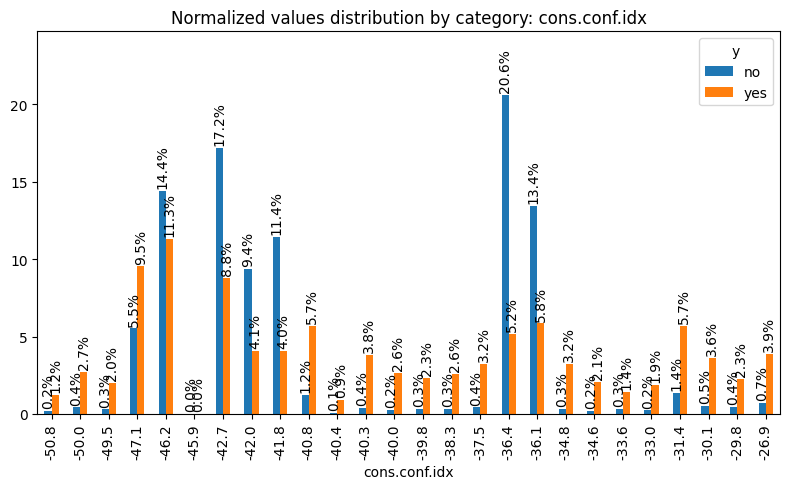

In [ ]:
bi_cat_distribution_sort_index(df, 'cons.conf.idx', 'y')

#### euribor3m

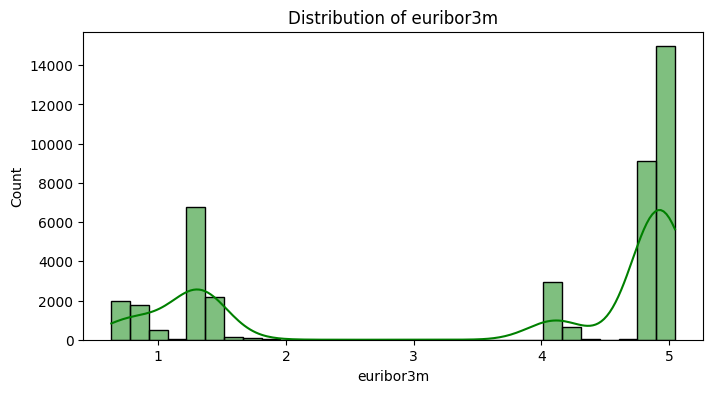

In [ ]:
show_distribution(df, 'euribor3m')

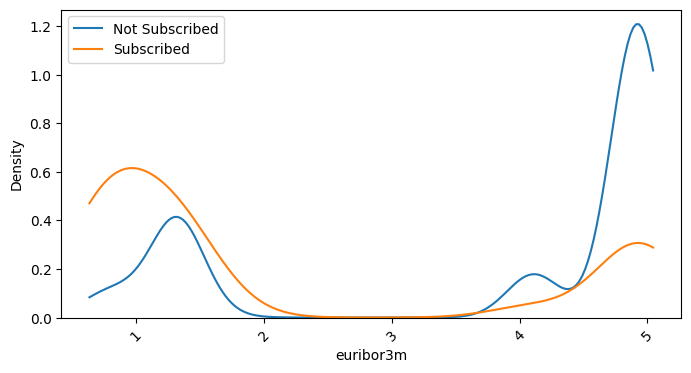

In [ ]:
show_kde(df, 'euribor3m')

Clients with `euribor3m` less than 2.2 were more likely to subscribe to deposit.

#### nr.employed

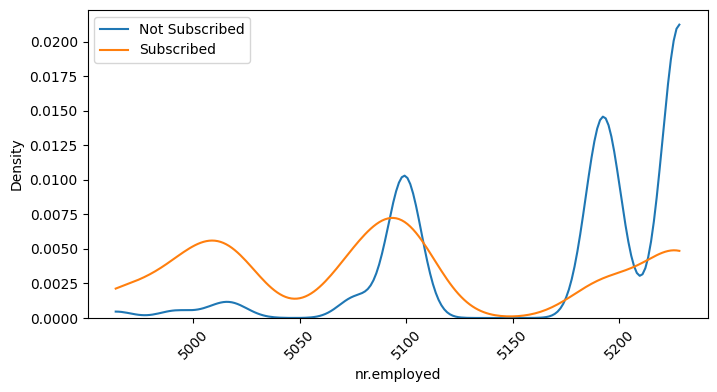

In [ ]:
show_kde(df, 'nr.employed')

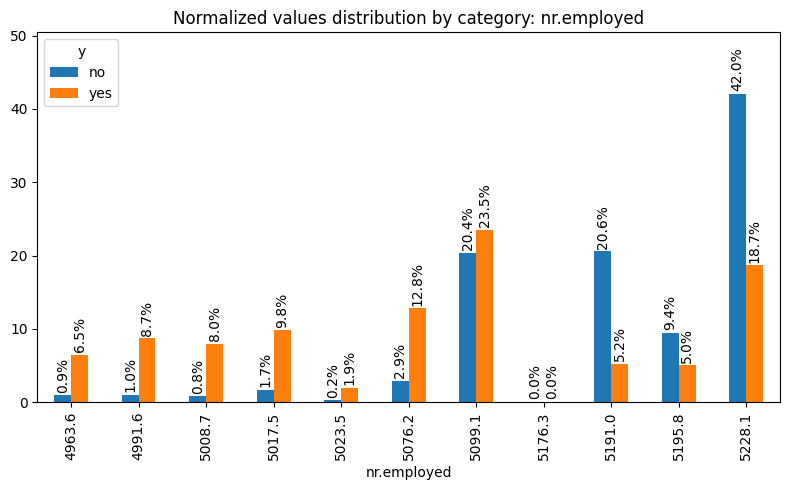

In [ ]:
bi_cat_distribution_sort_index(df, 'nr.employed', 'y')

Clients were more likely to subscribe to a term deposit during periods with a lower number of employees.

### Duplicates

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.duplicated().sum()

12

In [ ]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(41176, 21)

In [ ]:
df.to_csv('./bank-additional-processed.csv', index=False)

### Conclusion: Categories of clients to focus on when offering a term deposit

- Clients with job categories admin, retired, and student
- Single clients
- Clients with university degree
- Clients contacted by cellular
- Clients with success result in the previous marketing campaign
- Clients which were previously contacted
- Clients with employement variation rate less than -0.2
- Clients with euribor3m less than 2.2